In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.dates as mdates
from datetime import datetime
import matplotlib.pyplot as plt
import glob as gb
import os
import matplotlib.dates as mdates

%matplotlib notebook

In [6]:
# Load HDF file
df = pd.HDFStore('../Data/analysis_longrun.h5')['df']
df['delta'] = (df['datetime']-df['datetime'][0]).fillna(0).astype('timedelta64[us]')/(1E6*60)
df[['power']] = df[['power']].apply(pd.to_numeric)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31370 entries, 0 to 31369
Data columns (total 17 columns):
datetime            31370 non-null datetime64[ns]
chip                31370 non-null object
concentration       0 non-null float64
current             31370 non-null float64
fs                  31370 non-null float64
humidity            31370 non-null object
measurementID       31370 non-null float64
medium              31370 non-null object
power               31370 non-null float64
sample_no           31370 non-null int64
tempC               31370 non-null object
thermocouple_in     31370 non-null object
thermocouple_out    31370 non-null object
A                   31370 non-null float64
tau                 31370 non-null float64
c                   31370 non-null float64
delta               31370 non-null float64
dtypes: datetime64[ns](1), float64(9), int64(1), object(6)
memory usage: 4.3+ MB


In [11]:
df.head()

,datetime,chip,concentration,current,fs,humidity,measurementID,medium,power,sample_no,tempC,thermocouple_in,thermocouple_out,A,tau,c,delta
0,2016-07-22 18:02:16.308287,T6,NaN,0.5,0.0001,45.11,1.469207e+09,Water,0.273185,1000,25.58,24.75,24.25,1.037686,7.196943,0.008305,0.000000
1,2016-07-22 18:02:19.600475,T6,NaN,0.5,0.0001,44.97,1.469207e+09,Water,0.272863,1000,25.45,24.75,24.50,1.045647,7.176914,0.010017,0.054870
2,2016-07-22 18:02:22.999669,T6,NaN,0.5,0.0001,44.97,1.469207e+09,Water,0.272944,1000,25.45,24.75,24.50,1.034082,7.230318,0.011630,0.111523
3,2016-07-22 18:02:26.423865,T6,NaN,0.5,0.0001,45.10,1.469207e+09,Water,0.273105,1000,25.40,24.75,24.25,1.043463,7.201142,0.006543,0.168593
4,2016-07-22 18:02:29.802058,T6,NaN,0.5,0.0001,45.06,1.469207e+09,Water,0.272460,1000,25.42,24.75,24.25,1.035120,7.208410,0.007484,0.224896


<IPython.core.display.Javascript object>


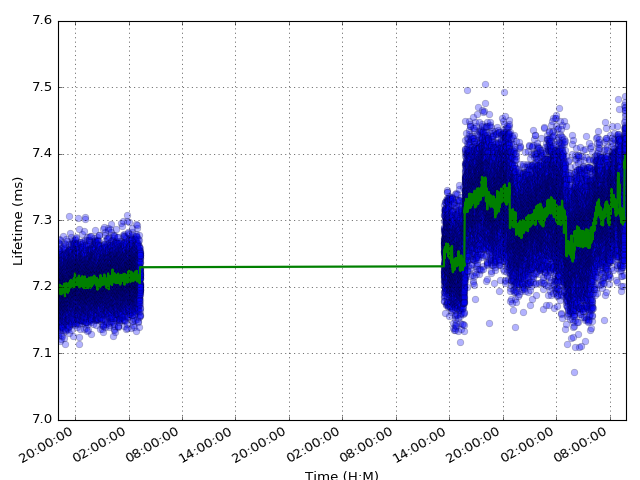

In [24]:
# Create plot of lifetime vs time
fig, ax = plt.subplots()
ax.plot('datetime', 'tau', 'o', alpha=0.3, data=df)
rolling = df['tau'].rolling(window=50, center=True).mean()
ax.plot(df['datetime'], rolling, '-', lw=2)  # label='rolling ({k})'.format(k=key)

# format the ticks
fig.autofmt_xdate()  # Rotate slightly

ax.xaxis.grid(True, which="major")
ax.yaxis.grid()
plt.tight_layout()
plt.ticklabel_format(useOffset=False, axis='y')

plt.xlabel('Time (H:M)')
plt.ylabel('Lifetime (ms)')
# plt.savefig("../Data/" + str(timestamp) + '/lifetimeVsTime.png', dpi=500)

In [35]:
df = df.set_index('delta')

<IPython.core.display.Javascript object>


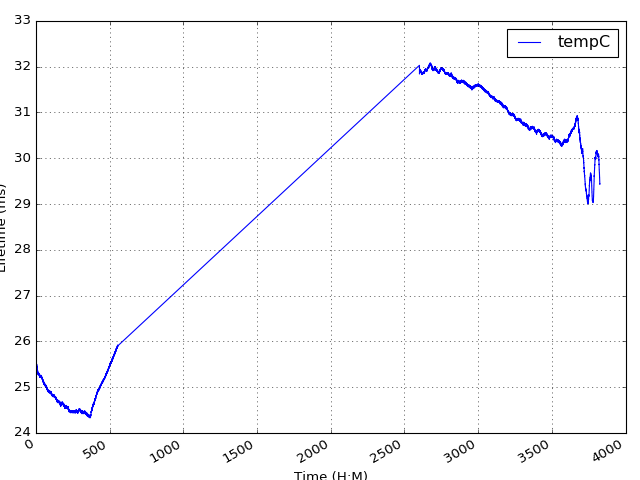

In [37]:
# Create plot of lifetime vs time
fig, ax = plt.subplots()
ax.plot('tempC', '-', data=df)

ax.xaxis.grid(True, which="major")
ax.yaxis.grid()
# format the ticks
fig.autofmt_xdate()  # Rotate slightly
plt.tight_layout()
plt.ticklabel_format(useOffset=False, axis='y')

plt.xlabel('Time (H:M)')
plt.ylabel('Lifetime (ms)')
plt.legend()
# plt.savefig("Data/" + str(timestamp) + '/lifetimeVsTime.png', dpi=500)

<IPython.core.display.Javascript object>


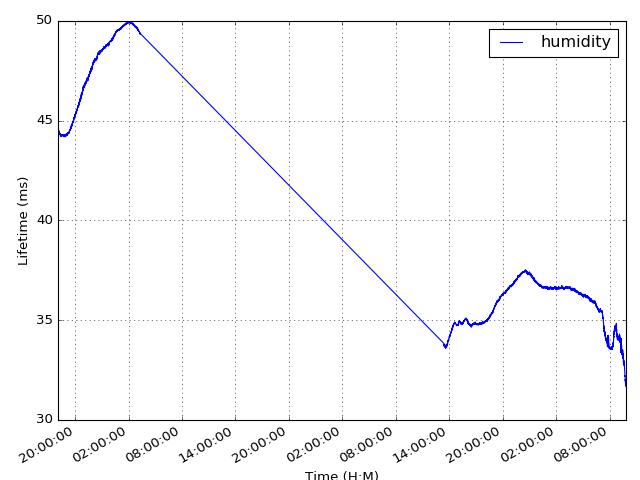

<IPython.core.display.Javascript object>


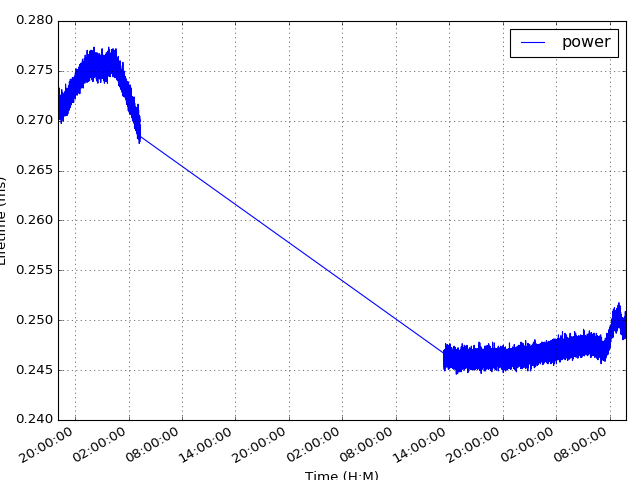

<IPython.core.display.Javascript object>


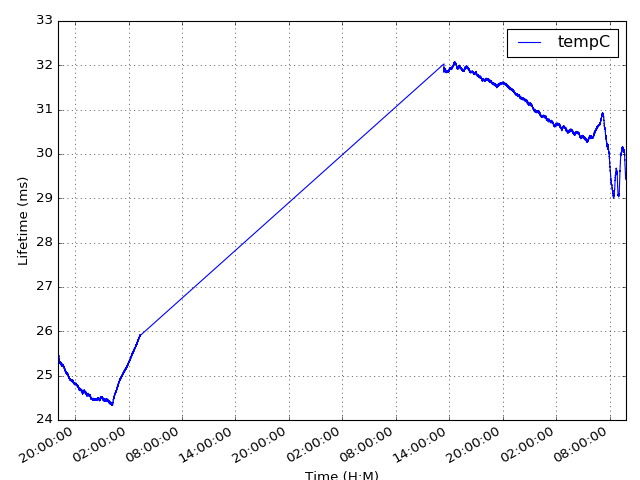

<IPython.core.display.Javascript object>


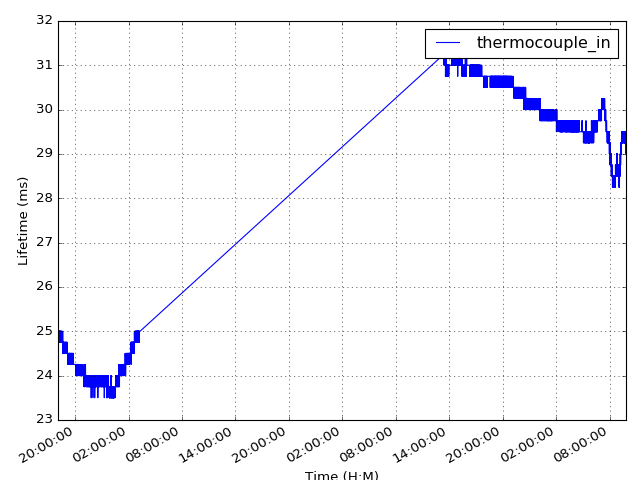

<IPython.core.display.Javascript object>


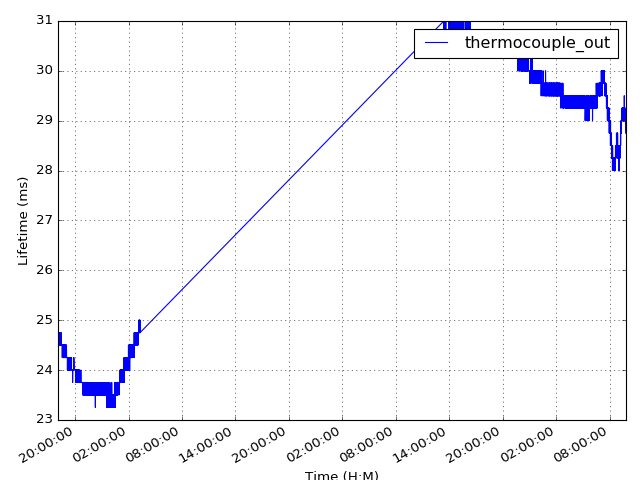

<IPython.core.display.Javascript object>


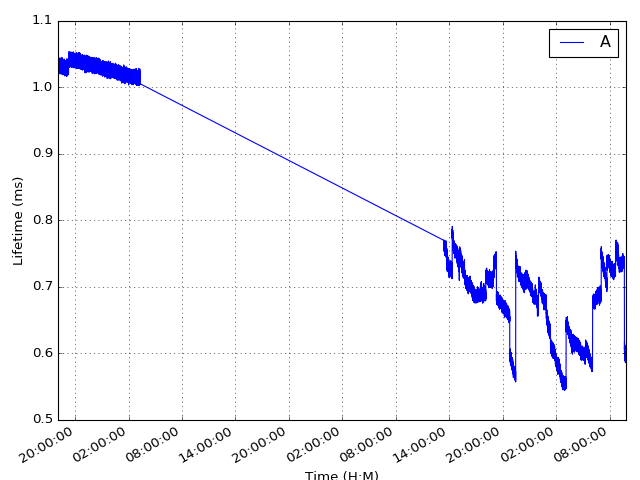

<IPython.core.display.Javascript object>


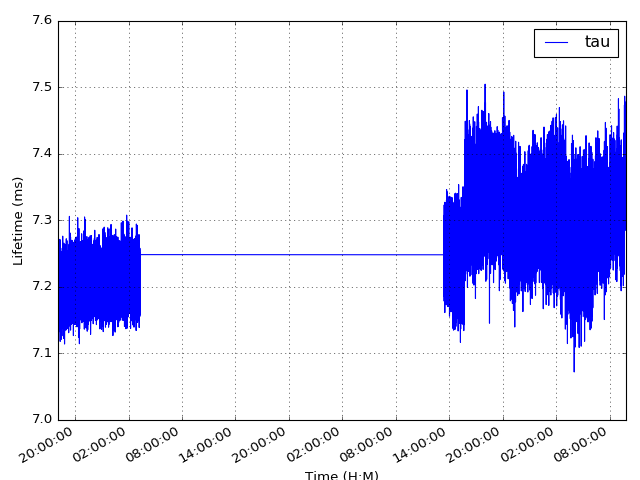

<IPython.core.display.Javascript object>


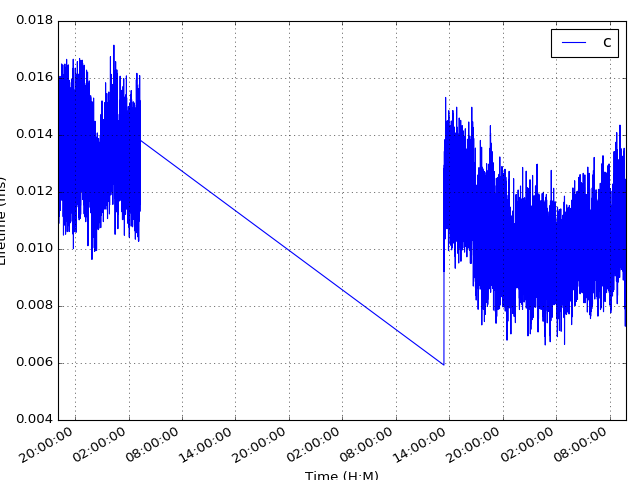

In [32]:
# Plot all data
for col in ['humidity', 'power', 'tempC', 'thermocouple_in', 'thermocouple_out', 'A', 'tau', 'c']:
    fig, ax = plt.subplots()
    ax.plot(col, '-', data=df)

    ax.xaxis.grid(True, which="major")
    ax.yaxis.grid()
    # format the ticks
    fig.autofmt_xdate()  # Rotate slightly
    plt.tight_layout()
    plt.ticklabel_format(useOffset=False, axis='y')

    plt.xlabel('Time (H:M)')
    plt.ylabel('Lifetime (ms)')
    plt.legend()

In [33]:
plt.close("all")

# Lifetime

In [38]:
# Calculate rolling dataframe
r = df.rolling(window=50)

<IPython.core.display.Javascript object>


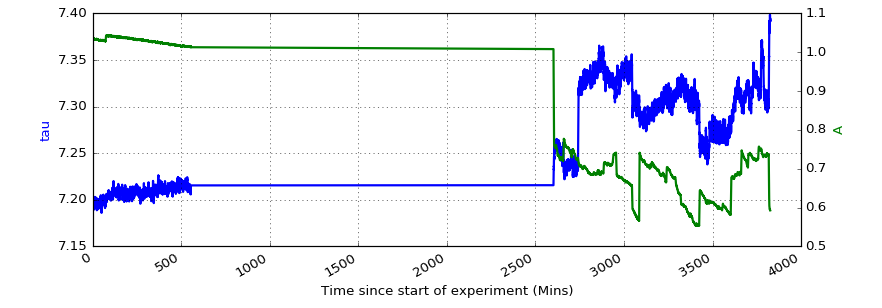

In [84]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.plot(r['tau'].mean(), '-', color='b', lw=2)
ax1.set_ylabel('tau', color='b')

ax2.plot(r['A'].mean(), '-', color='g', lw=2)
ax2.set_ylabel('A', color='g')

ax1.set_xlabel('Time since start of experiment (Mins)')
ax1.grid()
plt.tight_layout()
ax1.ticklabel_format(useOffset=False, axis='y')
ax2.ticklabel_format(useOffset=False, axis='y')


fig.autofmt_xdate()  # Rotate xticks slightly
# plt.tight_layout()
# plt.savefig("../Data/RollingMean.png", dpi=600)

<IPython.core.display.Javascript object>


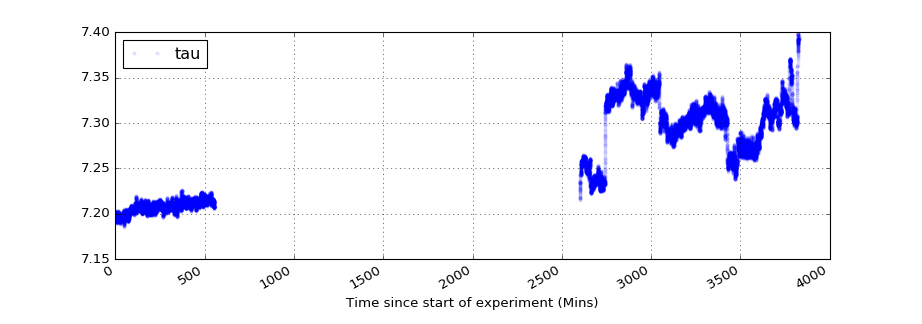

In [83]:
fig, ax = plt.subplots()

ax.plot(r['tau'].mean(), '.', alpha=0.1, lw=2)

ax.xaxis.grid(True, which="major")
ax.yaxis.grid()
# format the ticks
fig.autofmt_xdate()  # Rotate slightly
# plt.tight_layout()
plt.ticklabel_format(useOffset=False, axis='y')

plt.xlabel('Time since start of experiment (Mins)')
# plt.ylabel('Life (degrees)')
plt.legend(loc='best')
# plt.savefig("../Data/RollingMean.png", dpi=600)

# Laser Optical Power

<IPython.core.display.Javascript object>


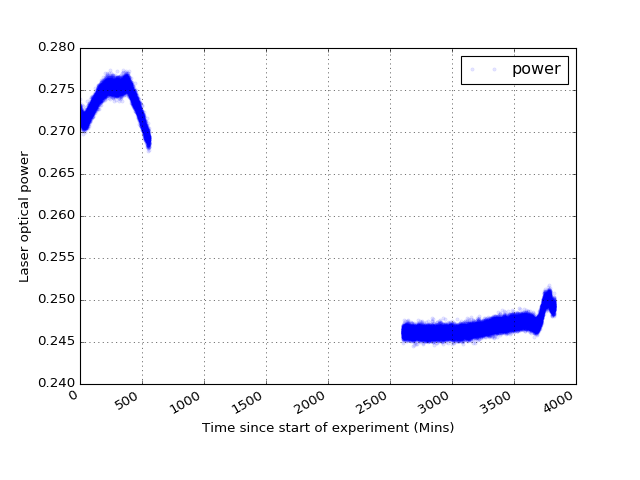

In [70]:
fig, ax = plt.subplots()

ax.plot('power', '.', alpha=0.1, data=df)

ax.xaxis.grid(True, which="major")
ax.yaxis.grid()
# format the ticks
fig.autofmt_xdate()  # Rotate slightly
# plt.tight_layout()
plt.ticklabel_format(useOffset=False, axis='y')

plt.xlabel('Time since start of experiment (Mins)')
plt.ylabel('Laser optical power')
plt.legend(loc='best')
# plt.savefig("../Data/RollingMean.png", dpi=600)

<IPython.core.display.Javascript object>


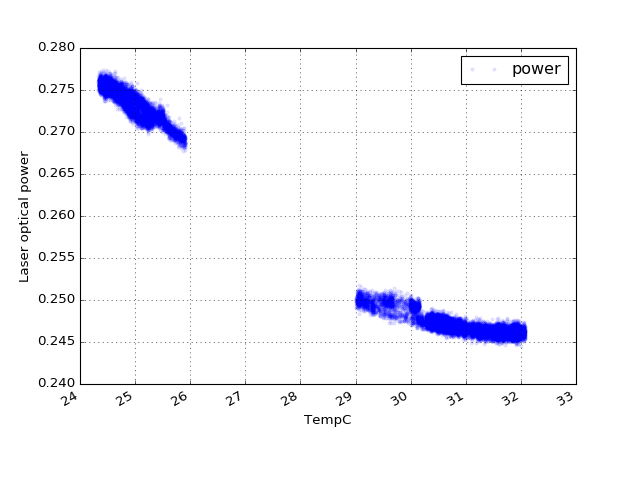

In [75]:
fig, ax = plt.subplots()

ax.plot('tempC', 'power', '.', alpha=0.1, data=df)
# ax.plot('humidity', 'power', '.', alpha=0.1, data=df)

ax.xaxis.grid(True, which="major")
ax.yaxis.grid()
# format the ticks
fig.autofmt_xdate()  # Rotate slightly
# plt.tight_layout()
plt.ticklabel_format(useOffset=False, axis='y')

plt.xlabel('TempC')
plt.ylabel('Laser optical power')
plt.legend(loc='best')
# plt.savefig("../Data/RollingMean.png", dpi=600)

# Ambient

<IPython.core.display.Javascript object>


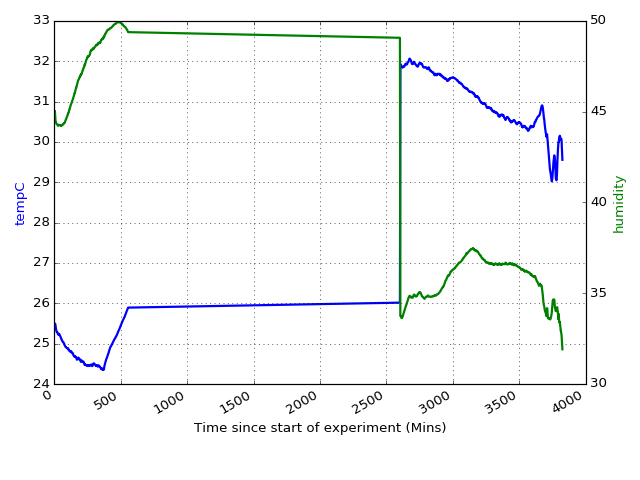

In [51]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.plot(r['tempC'].mean(), '-', color='b', lw=2)
ax1.set_ylabel('tempC', color='b')

ax2.plot(r['humidity'].mean(), '-', color='g', lw=2)
ax2.set_ylabel('humidity', color='g')

ax1.set_xlabel('Time since start of experiment (Mins)')
ax1.grid()
plt.tight_layout()
ax1.ticklabel_format(useOffset=False, axis='y')
ax2.ticklabel_format(useOffset=False, axis='y')


fig.autofmt_xdate()  # Rotate xticks slightly
# plt.tight_layout()
# plt.savefig("../Data/RollingMean.png", dpi=600)

# Thermocouples

<IPython.core.display.Javascript object>


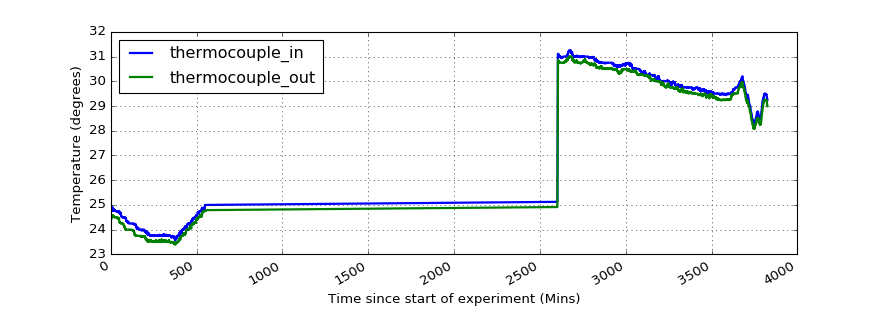

In [39]:
fig, ax = plt.subplots()

ax.plot(r['thermocouple_in'].mean(), '-', lw=2)
ax.plot(r['thermocouple_out'].mean(), '-', lw=2)

ax.xaxis.grid(True, which="major")
ax.yaxis.grid()
# format the ticks
fig.autofmt_xdate()  # Rotate slightly
# plt.tight_layout()
plt.ticklabel_format(useOffset=False, axis='y')

plt.xlabel('Time since start of experiment (Mins)')
plt.ylabel('Temperature (degrees)')
plt.legend(loc='best')
# plt.savefig("../Data/RollingMean.png", dpi=600)

In [82]:
df.plot?